In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
data=pd.read_csv('ElectionData.csv')

In [46]:
data

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,...,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77
2,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,B.E.,0,6.81,7.15,26307,16,19
3,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,CDS-PP,0,4.90,5.14,18923,12,5
4,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.50,8874,...,52.66,813743,428546,PCP-PEV,0,4.59,4.83,17757,11,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21638,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,NC,0,0.19,0.20,332,0,0
21639,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PNR,0,0.18,0.19,326,0,0
21640,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,MPT,0,0.14,0.15,256,0,0
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,...,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0


In [47]:
print(data.isnull().any())

TimeElapsed                 False
time                        False
territoryName               False
totalMandates               False
availableMandates           False
numParishes                 False
numParishesApproved         False
blankVotes                  False
blankVotesPercentage        False
nullVotes                   False
nullVotesPercentage         False
votersPercentage            False
subscribedVoters            False
totalVoters                 False
pre.blankVotes              False
pre.blankVotesPercentage    False
pre.nullVotes               False
pre.nullVotesPercentage     False
pre.votersPercentage        False
pre.subscribedVoters        False
pre.totalVoters             False
Party                       False
Mandates                    False
Percentage                  False
validVotesPercentage        False
Votes                       False
Hondt                       False
FinalMandates               False
dtype: bool


In [48]:
data.nunique()

TimeElapsed                   54
time                          54
territoryName                 21
totalMandates                 62
availableMandates             69
numParishes                   20
numParishesApproved          219
blankVotes                   329
blankVotesPercentage         146
nullVotes                    331
nullVotesPercentage          107
votersPercentage             282
subscribedVoters             335
totalVoters                  336
pre.blankVotes               323
pre.blankVotesPercentage     130
pre.nullVotes                329
pre.nullVotesPercentage       90
pre.votersPercentage         278
pre.subscribedVoters         331
pre.totalVoters              331
Party                         21
Mandates                      67
Percentage                  1363
validVotesPercentage        1387
Votes                       4029
Hondt                         41
FinalMandates                 17
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    if data[i].dtype=='object':
        data[i]=le.fit_transform(data[i])

In [50]:
data.drop(['TimeElapsed','time'],axis=1,inplace=True)

In [51]:
x = data.iloc[:, :-1].values

In [52]:
y=data.iloc[:,-1].values

In [53]:
x

array([[1.60000e+01, 0.00000e+00, 2.26000e+02, ..., 4.02200e+01,
        1.47993e+05, 9.40000e+01],
       [1.60000e+01, 0.00000e+00, 2.26000e+02, ..., 3.49500e+01,
        1.28624e+05, 8.10000e+01],
       [1.60000e+01, 0.00000e+00, 2.26000e+02, ..., 7.15000e+00,
        2.63070e+04, 1.60000e+01],
       ...,
       [1.90000e+01, 8.00000e+00, 0.00000e+00, ..., 1.50000e-01,
        2.56000e+02, 0.00000e+00],
       [1.90000e+01, 8.00000e+00, 0.00000e+00, ..., 1.40000e-01,
        2.39000e+02, 0.00000e+00],
       [1.90000e+01, 8.00000e+00, 0.00000e+00, ..., 7.00000e-02,
        1.18000e+02, 0.00000e+00]])

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
def r2scoref(reg,x,y):
    max_r_score=0
    for r in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r,test_size=0.20)
        reg.fit(x_train,y_train)
        y_pred=reg.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            r_state=r
            plt.scatter(x=y_test,y=y_pred)
    print('Maximum r2 score corresponding to random state',r_state,'is',max_r_score)
    return(r_state)

Maximum r2 score corresponding to random state 49 is 1.0


49

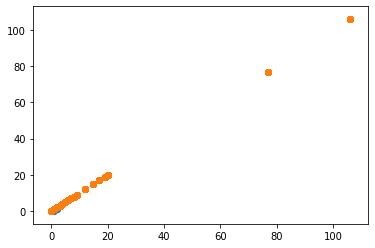

In [55]:
from sklearn.tree import DecisionTreeRegressor
dtc = DecisionTreeRegressor(random_state = 0)
r2scoref(dtc,x,y)

Maximum r2 score corresponding to random state 61 is 0.9952016409166992


61

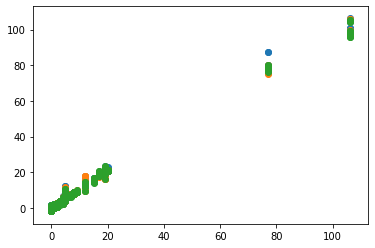

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
r2scoref(lr,x,y)

Maximum r2 score corresponding to random state 85 is 0.9855887003615594


85

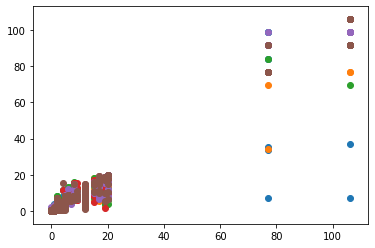

In [57]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=4)
r2scoref(knr,x,y)

Maximum r2 score corresponding to random state 61 is 0.9943200721038787


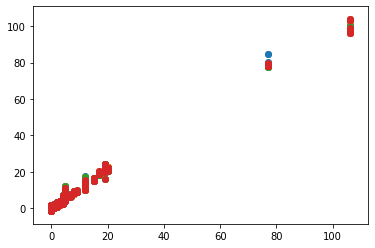

In [58]:
from sklearn.linear_model import Lasso
lso=Lasso(alpha=.1)
r_state=r2scoref(lso,x,y)

In [59]:
from sklearn.model_selection import cross_val_score
print('Mean r2_score for Decision Tree regression is:',cross_val_score(dtc,x,y,cv=10,scoring="r2").mean())
print('Standard Deviation for Decision Tree regression is :',cross_val_score(dtc,x,y,cv=5,scoring="r2").std())

Mean r2_score for Decision Tree regression is: 0.9997157152184795
Standard Deviation for Decision Tree regression is : 0.003208470067404496


In [60]:
from sklearn.externals import joblib
joblib.dump(knr,'ElectionResult_FinalMandates.pkl')

['ElectionResult_FinalMandates.pkl']